# Исследование объявлений о продаже квартир

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 
По каждой квартире есть два типа получения данных. Первые заполняют пользователи, вторые — получены автоматически. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.


Нужно определить рыночную стоимость объектов недвижимости, установить параметры. Это позволит построить автоматизированную систему и отследит аномалии. 


### Откроем файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv ('real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Мы загрузили файл, поставили необходимый знак разделителя, сохранили его в датафрайм data и вывели на печать первые 5 строк 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Вывели информация о датафрайме что бы увидеть название столбцов количество строк с данными и тип данных в соответствующих строках 

In [5]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

Изменили название столбца «cityCenters_nearest» на «city_centers_nearest»   так как применялся ‘верблюжий’ и ‘змеиный’ стиль одновременно 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Повторно вывели информацию о датафрайме что бы проверить вступили ли изменения в силу 

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], 

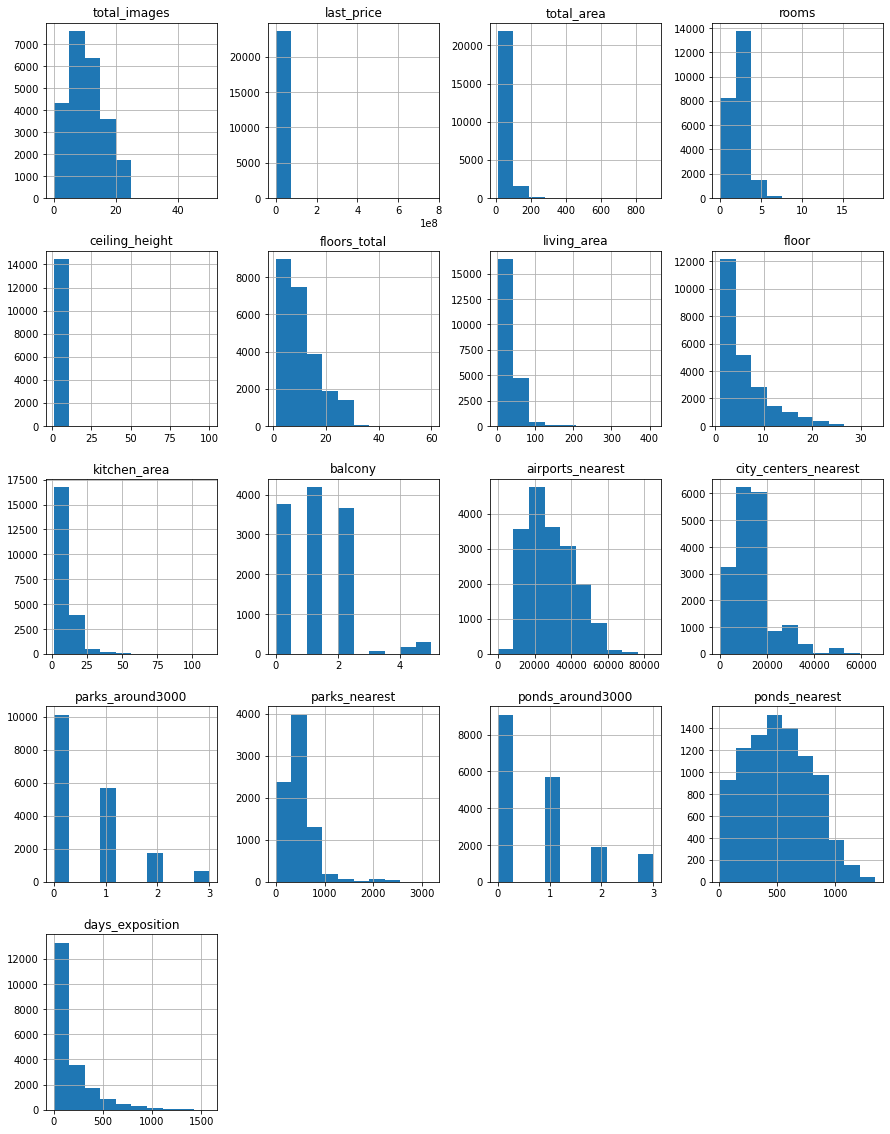

In [7]:
data.hist(figsize=(15, 20))

Вывели гистокраммы для каждого столбца датафрайма для визуализации данных  

При ознакомлении с данными мы видим большое количество пропусков и не оптимальное название столбцов

### Предобработка данных

In [8]:
data.duplicated().sum()

0

Проверили на наличие явных дубликатов и не обнаружили их

Начинаем обрабатывать пропуски и нереалистичные значения. Для этого вызовем все уникальные значения в столбце с пропусками, для удобства восприятия отсортируем их в порядка возрастания 

In [9]:
data['total_images'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,
       37, 39, 42, 50], dtype=int64)

В столбце «total_images» пропусков и аномалий нет

In [10]:
data['last_price'].sort_values()

8793         12190.0
17456       430000.0
14911       430000.0
16274       440000.0
17676       450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23699, dtype: float64

В строке № 8793 подозрительно низкая цена 12 190, изучим её подробнее. Выведем на экран все данный из этой строки  

In [11]:
data [8793:8794]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Квартира в Санкт- Петербурге, площадью 109 м2 недалеко от парка за 12 190 слишком хорошо что бы быть правдой. Похоже на ошибке в данных или указаны цена в другой валюте. В любом случае похоже на аномалию и данную строчку лучше удалить 

In [12]:
data = data.drop(data.index [8793])

In [13]:
data['last_price'].sort_values()

17456       430000.0
14911       430000.0
16274       440000.0
17676       450000.0
9581        450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23698, dtype: float64

В столбце «last_price» больше нет аномалий , кто-то продаёт подешевле (430 000), кто-то подороже (763 000 000)

In [14]:
data['total_area'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

В столбце «total_area» пропусков и аномалий нет  

In [15]:
data['first_day_exposition'].sort_values().unique()

array(['2014-11-27T00:00:00', '2014-11-29T00:00:00',
       '2014-12-04T00:00:00', ..., '2019-05-01T00:00:00',
       '2019-05-02T00:00:00', '2019-05-03T00:00:00'], dtype=object)

In [16]:
data['first_day_exposition']= data['first_day_exposition'].astype('datetime64')

Изменим тип данных с текстового на тап даты и времени, как как этот тип данных больше подходит к столбцу 

В столбце «first_day_exposition» пропусков и аномалий нет

In [17]:
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19],
      dtype=int64)

Изучим строки в которых 0 комнат, возможно так обозначены квартиры студии 

In [18]:
data.loc[data['rooms'] == 0].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0


Квартирам с нулём комнат соответствуют небольшие по площади квартиры, предположение оказалось правильным. 
Больше пропусков и аномалий в столбце «rooms» не наблюдается 

In [19]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

В столбце «ceiling_height» наблюдаются пропуски и комплекс подозрительных данных.
Начнём по порядку 
заполним пропуски медианными значениями используя метод  .fillna  


In [20]:
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())

In [21]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Пропуски мы убрали, теперь распрощаемся с тем, кто живёт в маяке (100 метров потолок) и с тем, кто живём в очень низких помещениях, до 2х метров. Это похоже на ошибку или очень странные жилища, и то и другое нам не подходит.  

In [22]:
data.query('2>=ceiling_height  or  ceiling_height == 100').count()

total_images            15
last_price              15
total_area              15
first_day_exposition    15
rooms                   15
ceiling_height          15
floors_total            15
living_area             13
floor                   15
is_apartment             2
studio                  15
open_plan               15
kitchen_area            13
balcony                  5
locality_name           15
airports_nearest         6
city_centers_nearest     6
parks_around3000         6
parks_nearest            4
ponds_around3000         6
ponds_nearest            5
days_exposition         12
dtype: int64

Если мы удалим строки с этими данными то потеряем только 15 строк, приемлемо 

In [23]:
data = data.query('2< ceiling_height < 100')

Высота потолков от 24 до 32 больше похоже на ошибку ввода данных, разделим значения на 10 и получим более реалистичные данные 

In [24]:
def lowering_ceiling(height):
    if height >= 24:
          return height /10
    else:
          return height
    
    

Для этого напишем функцию и пременим её

In [25]:
data['ceiling_height'] = data['ceiling_height'].apply(lowering_ceiling)

In [26]:
data['ceiling_height'].sort_values().unique()

array([ 2.2 ,  2.25,  2.3 ,  2.34,  2.4 ,  2.45,  2.46,  2.47,  2.48,
        2.49,  2.5 ,  2.51,  2.52,  2.53,  2.54,  2.55,  2.56,  2.57,
        2.58,  2.59,  2.6 ,  2.61,  2.62,  2.63,  2.64,  2.65,  2.66,
        2.67,  2.68,  2.69,  2.7 ,  2.71,  2.72,  2.73,  2.74,  2.75,
        2.76,  2.77,  2.78,  2.79,  2.8 ,  2.81,  2.82,  2.83,  2.84,
        2.85,  2.86,  2.87,  2.88,  2.89,  2.9 ,  2.91,  2.92,  2.93,
        2.94,  2.95,  2.96,  2.97,  2.98,  2.99,  3.  ,  3.01,  3.02,
        3.03,  3.04,  3.05,  3.06,  3.07,  3.08,  3.09,  3.1 ,  3.11,
        3.12,  3.13,  3.14,  3.15,  3.16,  3.17,  3.18,  3.2 ,  3.21,
        3.22,  3.23,  3.24,  3.25,  3.26,  3.27,  3.28,  3.29,  3.3 ,
        3.31,  3.32,  3.33,  3.34,  3.35,  3.36,  3.37,  3.38,  3.39,
        3.4 ,  3.42,  3.43,  3.44,  3.45,  3.46,  3.47,  3.48,  3.49,
        3.5 ,  3.51,  3.52,  3.53,  3.54,  3.55,  3.56,  3.57,  3.58,
        3.59,  3.6 ,  3.62,  3.63,  3.65,  3.66,  3.67,  3.68,  3.69,
        3.7 ,  3.75,

Повторно изучим все значения в столбце «ceiling_height». Больше пропусков и аномалий нет. Приступаем к изучению следующего столбца 

In [27]:
data['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 52., 60., nan])

Есть пропущенные значения, посмотрим как их много вызвав метод  .value_counts
Для подсчёта количества пропусков применим переменную «dropna=False»


In [28]:
data['floors_total'].value_counts(dropna=False)

5.0     5782
9.0     3760
16.0    1376
12.0    1360
4.0     1200
10.0    1174
25.0    1074
6.0      914
17.0     832
3.0      668
7.0      592
14.0     553
18.0     504
24.0     469
8.0      390
2.0      381
15.0     364
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
NaN       86
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
Name: floors_total, dtype: int64

Пропусков немного (86), они не должны повлиять на общий вывод, оставим столбец без изменений 

In [29]:
data['living_area'].sort_values().unique()

array([  2. ,   3. ,   5. , ..., 409. , 409.7,   nan])

В строке «living_area» есть пропущение значения,  для их заполнения возьмём процент от разницы общей площади и жилой площади по всему датофрайму и получим процент нежилой площади от общий

In [30]:
 ((data['total_area']- data['living_area'])/100).median()

0.22

процент составил 0.22 . 

In [31]:
data['living_area']= data['living_area'].fillna(data['total_area'] * 0.78)

Жилая площадь в среднем составляет 78% от бошей площади. Умножим соответствующие значения из строй общий площади на 0.78 и получим значения общей площади   

In [32]:
data['living_area'].sort_values().unique()

array([  2.  ,   3.  ,   5.  , ..., 409.  , 409.7 , 492.18])

В столбце «living_area» есть очень маленькие значения, кохоже на ощибки, уберём строки в которых жилая площадь до 5 м.

In [33]:
data.query('5>=living_area ').count()

total_images            5
last_price              5
total_area              5
first_day_exposition    5
rooms                   5
ceiling_height          5
floors_total            5
living_area             5
floor                   5
is_apartment            0
studio                  5
open_plan               5
kitchen_area            3
balcony                 2
locality_name           5
airports_nearest        4
city_centers_nearest    4
parks_around3000        4
parks_nearest           2
ponds_around3000        4
ponds_nearest           3
days_exposition         5
dtype: int64

Строк со значением ниже 5 только 5 шт. Удаляем 

In [34]:
data = data.query('5<living_area ')

In [35]:
data['living_area'].sort_values().unique()

array([  5.4 ,   6.  ,   6.5 , ..., 409.  , 409.7 , 492.18])

В столбце «living_area» пропусков и аномалий больше нет

In [36]:
data['floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

В столбце «floor» пропусков и аномалий нет

In [37]:
data['is_apartment'].sort_values().unique()

array([False, True, nan], dtype=object)

В столбце «is_apartment» есть пропуски. Заполним их, «False» так как если не указано что это апартаменты жьльё скорее всего ими не является. В связи с тем что данный столбец нам не понадобится для дальнейших расчётов, такая точность нас устроит 

In [38]:
data['is_apartment']=data['is_apartment'].fillna(False)

In [39]:
data['is_apartment'].sort_values().unique()

array([False,  True])

В столбце «is_apartment» пропусков и аномалий нет

In [40]:
data['studio'].sort_values().unique()

array([False,  True])

В столбце «studio» пропусков и аномалий нет

In [41]:
data['open_plan'].sort_values().unique()

array([False,  True])

В столбце «open_plan» пропусков и аномалий нет

In [42]:
data['kitchen_area'].sort_values().unique()

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

В столбце «kitchen_area» есть пропуски, проведём операции аналогично столбцу «living_area»

In [43]:
kitchen_area_median = (data['kitchen_area'].median()/data['total_area']).median()

In [44]:
data['kitchen_area']= data['kitchen_area'].fillna(data['total_area'] *kitchen_area_median)

In [45]:
data['kitchen_area'].sort_values().unique()

array([  1.3,   2. ,   2.1, ..., 100.7, 107. , 112. ])

В столбце «kitchen_area» пропусков и аномалий нет

In [46]:
data['balcony'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan])

В столбце «balcony» есть пропуски. Заменим их на нули.

In [47]:
data['balcony']= data['balcony'].fillna(0).astype('float64')

Вызвали функцию  astype что бы новые значения были того же типа как и остальные значения в столбце 

In [48]:
data['balcony'].sort_values().unique

<bound method Series.unique of 0        0.0
14125    0.0
14123    0.0
14122    0.0
14121    0.0
        ... 
13366    5.0
8790     5.0
10139    5.0
2624     5.0
1028     5.0
Name: balcony, Length: 23678, dtype: float64>

В столбце «balcony» пропусков и аномалий нет

In [49]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

В столбце «» видем неявные дубликаты из на написания «е» «ё» и «поселок городского типа» «поселок», уберём их методом str.replac. Так же сделаем все буквы строчными что бы избежать возможной ошибки связанной с регистром    

In [50]:
data['locality_name'].value_counts()

Санкт-Петербург                    15711
посёлок Мурино                       521
посёлок Шушары                       440
Всеволожск                           397
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

Посмотрим сколько всего строк с уникальным значением  

In [51]:
data['locality_name']=data['locality_name'].str.lower()
data['locality_name']=data['locality_name'].str.replace('ё','е' )
data['locality_name']=data['locality_name'].str.replace('поселок городского типа', '')
data['locality_name']=data['locality_name'].str.replace('городской поселок', '')
data['locality_name']=data['locality_name'].str.replace('поселок', '')
data['locality_name']=data['locality_name'].str.replace('деревня ', '')


In [52]:
data['locality_name'].sort_values().unique()

array([' александровская', ' алексеевка', ' аннино', ' барышево',
       ' белоостров', ' большая ижора', ' бугры', ' будогощь', ' важины',
       ' виллози', ' вознесенье', ' возрождение', ' войсковицы',
       ' войскорово', ' володарское', ' вырица', ' высокоключевой',
       ' гаврилово', ' гарболово', ' гладкое', ' глажево', ' глебычево',
       ' гончарово', ' громово', ' дзержинского', ' дружная горка',
       ' дружноселье', ' дубровка', ' елизаветино', ' ефимовский', ' жил',
       ' жилгородок', ' житково', ' заводской', ' запорожское',
       ' зимитицы', ' ильичево', ' имени морозова', ' имени свердлова',
       ' калитино', ' каложицы', ' кикерино', ' кингисеппский',
       ' кирпичное', ' кобралово', ' кобринское', ' коммунары',
       ' кондратьево', ' коробицыно', ' котельский', ' красная долина',
       ' красносельское', ' красный бор', ' кузнечное', ' кузьмоловский',
       ' лебяжье', ' левашово', ' ленинское', ' лесное', ' лесогорский',
       ' лисий нос', ' лукаш

In [53]:
data['locality_name'].value_counts()

санкт-петербург    15711
 мурино              555
кудрово              471
 шушары              440
всеволожск           397
                   ...  
 цвылево               1
кривко                 1
 жил                   1
 тесово-4              1
 дзержинского          1
Name: locality_name, Length: 321, dtype: int64

Количество строк с уникальным значением уменьшилось, теперь посмотрим сколько всего строк с пропусками  

In [54]:
data['locality_name'].isna().sum()

49

Строк с пропусками 49. Удалим их   

In [55]:
data = data[~data['locality_name'].isna()]

In [56]:
data['locality_name'].sort_values().unique()

array([' александровская', ' алексеевка', ' аннино', ' барышево',
       ' белоостров', ' большая ижора', ' бугры', ' будогощь', ' важины',
       ' виллози', ' вознесенье', ' возрождение', ' войсковицы',
       ' войскорово', ' володарское', ' вырица', ' высокоключевой',
       ' гаврилово', ' гарболово', ' гладкое', ' глажево', ' глебычево',
       ' гончарово', ' громово', ' дзержинского', ' дружная горка',
       ' дружноселье', ' дубровка', ' елизаветино', ' ефимовский', ' жил',
       ' жилгородок', ' житково', ' заводской', ' запорожское',
       ' зимитицы', ' ильичево', ' имени морозова', ' имени свердлова',
       ' калитино', ' каложицы', ' кикерино', ' кингисеппский',
       ' кирпичное', ' кобралово', ' кобринское', ' коммунары',
       ' кондратьево', ' коробицыно', ' котельский', ' красная долина',
       ' красносельское', ' красный бор', ' кузнечное', ' кузьмоловский',
       ' лебяжье', ' левашово', ' ленинское', ' лесное', ' лесогорский',
       ' лисий нос', ' лукаш

В столбце «locality_name» пропусков и аномалий нет

In [57]:
data['airports_nearest'].sort_values().unique()

array([    0.,  6450.,  6914., ..., 84853., 84869.,    nan])

В столбце «airports_nearest» есть значение 0. похоже на неверное значение. Посмотрим внимательнее 

In [58]:
data[data['airports_nearest'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,False,...,6.0,2.0,санкт-петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Узнаем сколько от пулково до центра города, «Расстояние Пулково Санкт-Петербург по трассе составляет 85 км, а по прямой - 63 км» . У нас в строке сильно меньше. Получается данные некорректны, удалим строку

In [59]:
data = data[data['airports_nearest'] != 0]

In [60]:
data['airports_nearest'].sort_values().unique()

array([ 6450.,  6914.,  6949., ..., 84853., 84869.,    nan])

Аномалий нет, посмотрим сколько строк с пропусками

In [61]:
data['airports_nearest'].isna().sum()

5524

Пять с половиной тысяч строк, очень большое значение что бы удалить и заполнять медианой по городу будет некорректно, оставим как есть    

In [62]:
data['city_centers_nearest'].sort_values().unique()

array([  181.,   208.,   215., ..., 65952., 65968.,    nan])

In [63]:
data['city_centers_nearest'].isna().sum()

5501

Аномалий нет, а с пропусками ситуация как в расстоянии до аэропорта     

In [64]:
data['parks_around3000'].sort_values().unique()

array([ 0.,  1.,  2.,  3., nan])

In [65]:
data['parks_around3000'].isna().sum()

5500

In [66]:
data['parks_nearest'].sort_values().unique()

array([1.000e+00, 3.000e+00, 4.000e+00, 7.000e+00, 9.000e+00, 1.000e+01,
       1.100e+01, 1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01,
       1.700e+01, 1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01,
       2.300e+01, 2.400e+01, 2.700e+01, 2.800e+01, 3.000e+01, 3.200e+01,
       3.300e+01, 3.400e+01, 3.500e+01, 3.600e+01, 3.700e+01, 3.800e+01,
       3.900e+01, 4.000e+01, 4.100e+01, 4.200e+01, 4.300e+01, 4.400e+01,
       4.500e+01, 4.600e+01, 4.700e+01, 4.800e+01, 4.900e+01, 5.000e+01,
       5.100e+01, 5.200e+01, 5.300e+01, 5.400e+01, 5.500e+01, 5.600e+01,
       5.700e+01, 5.800e+01, 5.900e+01, 6.000e+01, 6.100e+01, 6.200e+01,
       6.300e+01, 6.400e+01, 6.500e+01, 6.600e+01, 6.800e+01, 6.900e+01,
       7.100e+01, 7.200e+01, 7.300e+01, 7.400e+01, 7.500e+01, 7.600e+01,
       7.700e+01, 7.800e+01, 8.000e+01, 8.100e+01, 8.200e+01, 8.300e+01,
       8.400e+01, 8.500e+01, 8.600e+01, 8.700e+01, 8.800e+01, 9.000e+01,
       9.100e+01, 9.200e+01, 9.300e+01, 9.400e+01, 

In [67]:
data['parks_nearest'].isna().sum()

15571

По растоянию и количеству парков большое количество пропусков, удалять данный нельзя, оставим как есть 

In [68]:
data['ponds_around3000'].sort_values().unique()

array([ 0.,  1.,  2.,  3., nan])

In [69]:
data['ponds_around3000'].isna().sum()

5500

In [70]:
data['ponds_nearest'].sort_values().unique()

array([  13.,   16.,   19., ..., 1341., 1344.,   nan])

In [71]:
data['ponds_nearest'].isna().sum()

14551

Та же ситуация что и с парками 

In [72]:
data['ponds_nearest'].sort_values().unique()

array([  13.,   16.,   19., ..., 1341., 1344.,   nan])

Посмотрим на тот же столбец другим методом, данные станут более наглядными 

In [73]:
data['days_exposition'].describe()

count    20451.000000
mean       180.823529
std        219.848289
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [74]:
data['days_exposition'].sort_values().unique()

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.572e+03, 1.580e+03,
             nan])

In [75]:
data['days_exposition'].isna().sum()

3177

In [76]:
non_day_exposition = data[data['days_exposition'].isna()]
non_day_exposition.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000,8,False,...,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,55.848,22,False,...,18.9,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18,1,2.65,22.0,31.200,3,False,...,7.0,1.0,санкт-петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02,2,2.65,9.0,30.300,7,False,...,7.0,0.0,санкт-петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31,2,2.60,24.0,29.700,9,False,...,8.3,2.0,санкт-петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN


In [77]:
non_day_exposition['first_day_exposition'].value_counts()

2019-04-22    46
2019-04-18    44
2019-04-29    36
2019-04-08    36
2019-04-04    36
              ..
2018-09-06     1
2017-10-17     1
2014-12-27     1
2017-05-16     1
2017-07-21     1
Name: first_day_exposition, Length: 708, dtype: int64

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23628 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23628 non-null  int64         
 1   last_price            23628 non-null  float64       
 2   total_area            23628 non-null  float64       
 3   first_day_exposition  23628 non-null  datetime64[ns]
 4   rooms                 23628 non-null  int64         
 5   ceiling_height        23628 non-null  float64       
 6   floors_total          23543 non-null  float64       
 7   living_area           23628 non-null  float64       
 8   floor                 23628 non-null  int64         
 9   is_apartment          23628 non-null  bool          
 10  studio                23628 non-null  bool          
 11  open_plan             23628 non-null  bool          
 12  kitchen_area          23628 non-null  float64       
 13  balcony         

Во время предобработки данным мы удалили 71 строку которые нам показались подозрительными или в которых не было нужных данных и взять их было неоткуда. 
Исправили несколько ошибок в данных высота потолков. 
Убрали неявные дубликаты в названиях населённых пунктов 
В результате всех этих мероприятий мы получили данные с которыми можно выполнять дальнейшие задачи


In [79]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23628.000000,2.362800e+04,23628.000000,23628.000000,23628.000000,23543.000000,23628.000000,23628.000000,23628.000000,23628.000000,18104.000000,18127.000000,18128.000000,8057.000000,18128.000000,9077.000000,20451.000000
mean,9.864821,6.540828e+06,60.338906,2.070594,2.700413,10.674468,35.656641,5.891781,10.502748,0.591671,28804.170404,14198.515309,0.611540,490.776344,0.769362,518.156660,180.823529
std,5.681723,1.089408e+07,35.666794,1.078661,0.301370,6.592058,23.710615,4.881533,6.035488,0.959422,12638.579325,8608.013735,0.802107,342.639022,0.937699,277.718768,219.848289
min,0.000000,4.300000e+05,12.000000,0.000000,2.200000,1.000000,5.400000,1.000000,1.300000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.405000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18574.000000,9245.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.800000,4.000000,9.000000,0.000000,26755.500000,13107.000000,0.000000,454.000000,1.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.742500,3.000000,2.700000,16.000000,43.000000,8.000000,12.000000,1.000000,37310.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,22.600000,60.000000,492.180000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Добавим в таблицу новые столбцы

In [80]:
data['price_square_meter'] = (data['last_price']/data['total_area']).astype('int64')

Создадим столбец с ценой за 1 м2. И сделаем столбец в целых числах для удобства восприятия информации 

In [81]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,...,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,...,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,...,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,124.02,9,False,...,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,...,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000


Выведем на экран первые пять строк для проверки. Всё корректно  

In [82]:

data['publication_day']= data['first_day_exposition'].dt.weekday

In [83]:
def text_day(day):
    if day == 0:
        return 'Понедельные'
    elif day == 1:
        return 'Вторник'
    elif day == 2:
        return 'Среда' 
    elif day == 3:
        return 'Четверг'
    elif day == 4:
        return 'Пятница'
    elif day == 5:
        return 'Суббота'   
    else:
        return 'Воскресенье '


In [84]:
data['publication_day_text']= data['publication_day'].apply(text_day)

In [85]:
data['publication_month']= data['first_day_exposition'].dt.month

In [86]:
data['publication_year']= data['first_day_exposition'].dt.year

In [87]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,publication_day,publication_day_text,publication_month,publication_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,...,1.0,482.0,2.0,755.0,NaN,120370,3,Четверг,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,...,0.0,NaN,0.0,NaN,81.0,82920,1,Вторник,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,...,1.0,90.0,2.0,574.0,558.0,92785,3,Четверг,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,124.02,9,False,...,2.0,84.0,3.0,234.0,424.0,408176,4,Пятница,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,...,2.0,112.0,1.0,48.0,121.0,100000,1,Вторник,6,2018


Добавили столбцы с днём, месяцем и годом публикации. Вывели на экран первые 5 строк. Всё работает   

In [88]:
def floor_type(floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [89]:
data['floor_type'] = data[['floor', 'floors_total']].apply(floor_type, axis=1)

In [90]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,publication_day,publication_day_text,publication_month,publication_year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,...,482.0,2.0,755.0,NaN,120370,3,Четверг,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,...,NaN,0.0,NaN,81.0,82920,1,Вторник,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,...,90.0,2.0,574.0,558.0,92785,3,Четверг,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,124.02,9,False,...,84.0,3.0,234.0,424.0,408176,4,Пятница,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,...,112.0,1.0,48.0,121.0,100000,1,Вторник,6,2018,другой


Добавили столбец с типом этажа, для этого написали функцию, в которой сверяли столбы этажей и этажностью дома. 
Записали результаты работы функции в новый столбец и вывели на экран первые 5 строк    


In [91]:
data['distance_to_center_km'] = data['city_centers_nearest']/1000
data['distance_to_center_km'] =data['distance_to_center_km'].round()

In [92]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,publication_day,publication_day_text,publication_month,publication_year,floor_type,distance_to_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,...,2.0,755.0,NaN,120370,3,Четверг,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,...,0.0,NaN,81.0,82920,1,Вторник,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,...,2.0,574.0,558.0,92785,3,Четверг,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,124.02,9,False,...,3.0,234.0,424.0,408176,4,Пятница,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,...,1.0,48.0,121.0,100000,1,Вторник,6,2018,другой,8.0


Добавили столбец с расстоянием до центра в КМ и округлили его до целого методом «.round» .
Вывели на экран первые 5 строк таблицы для проверки


Для дальнейшего исследования мы добавили столбцы с ценой за м2, отдельные столбцы для дня месяца и года публикации и столбец с типом этажа и расстоянием до центра. 
Теперь мы можем приступить непосредственно к исследованию 


### Проведём исследовательский анализ данных

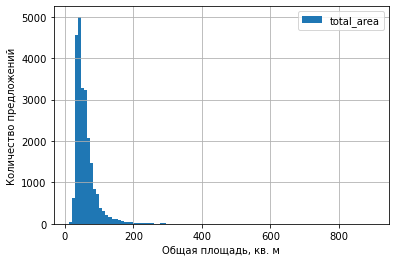

In [93]:
(data['total_area']
 .hist(bins= 100, legend=True, )
 .set(xlabel='Общая площадь, кв. м', ylabel='Количество предложений')
)
plt.show()

Построим гистограмму для общей площади. Разобьём ей на 100 корзин. Видим, что основной объём между 0 и 100. 

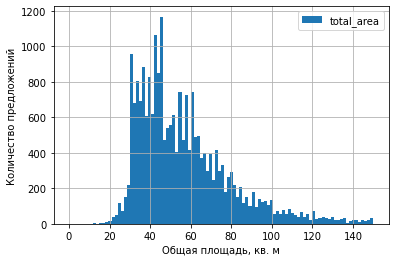

In [94]:
(data['total_area']
 .hist(bins= 100, range = (0,150), legend=True)
 .set(xlabel='Общая площадь, кв. м', ylabel='Количество предложений')
)
plt.show()

Для большей наглядность ограничим диапазон 150.  Тем самым убрав большие, но редкие значения. 
Видим, что основной объём данных — это квартиры площадью от 20 до 80м2. 


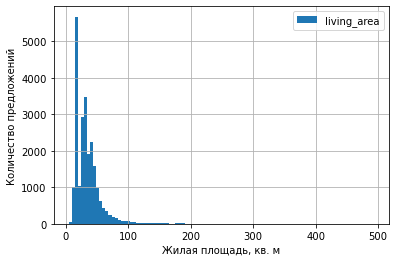

In [95]:
(data['living_area']
 .hist(bins= 100, legend=True)
 .set(xlabel='Жилая площадь, кв. м', ylabel='Количество предложений')
)
plt.show()

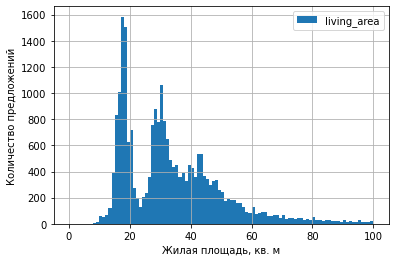

In [96]:
(data['living_area']
 .hist(bins= 100, range = (0,100), legend=True)
 .set(xlabel='Жилая площадь, кв. м', ylabel='Количество предложений')
)
plt.show()

Для жилой площади поведём те же манипуляции что и для общей площади. Только ограничим значения 100. Видим 2 пика, в районе  20 и 30 м2. Возможно это связано с заполнением пропущенных данных медианными значениями 

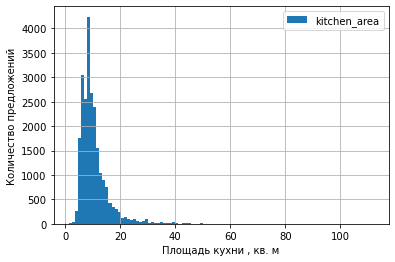

In [97]:
(data['kitchen_area']
 .hist(bins= 100, legend=True)
 .set(xlabel='Площадь кухни , кв. м', ylabel='Количество предложений')
)
plt.show()

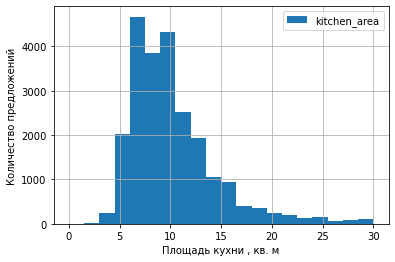

In [98]:
(data['kitchen_area']
 .hist(bins= 20, range = (0,30), legend=True)
 .set(xlabel='Площадь кухни , кв. м', ylabel='Количество предложений')
)
plt.show()

Повторим действия, видим основные предложения в районе 10м2

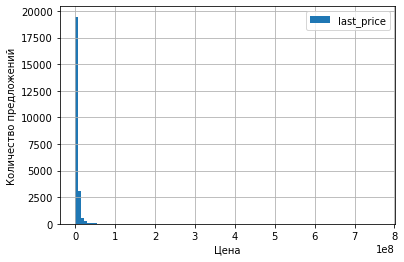

In [99]:
(data['last_price']
 .hist(bins= 100, legend=True)
 .set(xlabel='Цена', ylabel='Количество предложений')
)
plt.show()

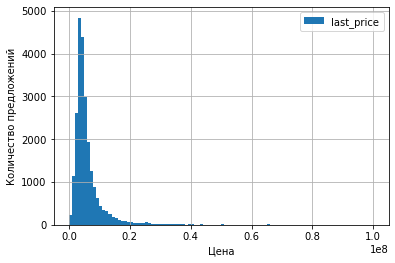

In [100]:
(data['last_price']
 .hist(bins= 100,  range = (0,100000000), legend=True)
 .set(xlabel='Цена', ylabel='Количество предложений')
)
plt.show()

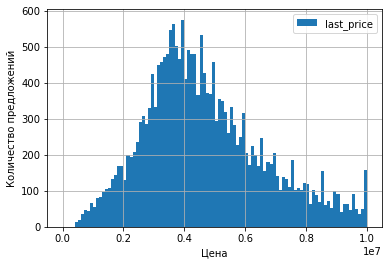

In [101]:
(data['last_price']
 .hist(bins= 100,  range = (0,10000000), legend=True)
 .set(xlabel='Цена', ylabel='Количество предложений')
)
plt.show()

Подобрав необходимое ограничение в диапазоне, видим пик в районе 4 000 000 

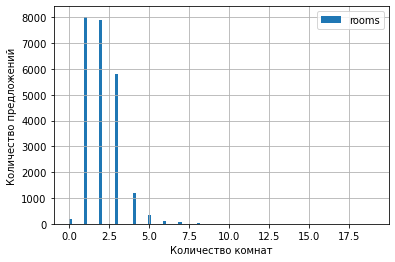

In [102]:
(data['rooms']
 .hist(bins= 100, legend=True)
 .set(xlabel='Количество комнат', ylabel='Количество предложений')
)
plt.show()

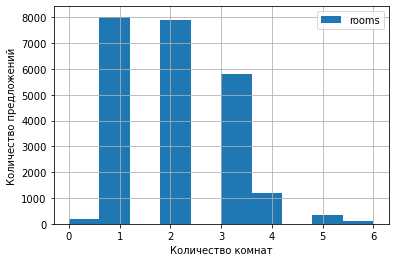

In [103]:
(data['rooms']
 .hist(bins= 10,  range = (0,6), legend=True)
 .set(xlabel='Количество комнат', ylabel='Количество предложений')
)
plt.show()

Уменьшив количество корзин и ограничив выборку . мы видим что 1 и 2 комнаты самые популярные планировки  

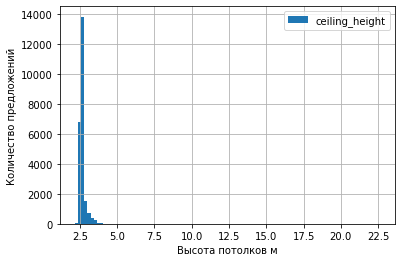

In [104]:
(data['ceiling_height']
 .hist(bins= 100, legend=True)
 .set(xlabel='Высота потолков м', ylabel='Количество предложений')
)
plt.show()

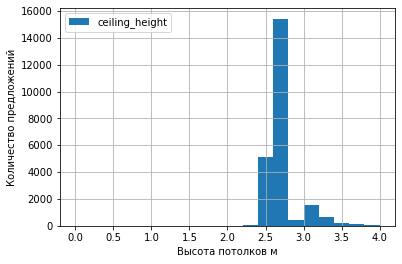

In [105]:
(data['ceiling_height']
 .hist(bins= 20,  range = (0,4), legend=True)
 .set(xlabel='Высота потолков м', ylabel='Количество предложений')
)
plt.show()

Применив 20 корзин и выборку до 4 метров, видим традиционную высоту потолков в районе 2.7 м  

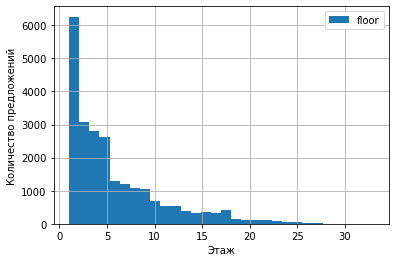

In [106]:
(data['floor']
 .hist(bins= 30, legend=True)
 .set(xlabel='Этаж', ylabel='Количество предложений')
)
plt.show()

Выбрав наглядное количество корзин, видим что большинство квартир на 1м этаже

[Text(0.5, 0, 'Тип этажа'), Text(0, 0.5, 'Количество предложений')]

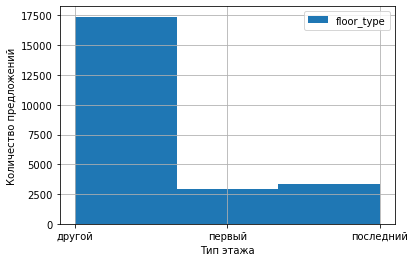

In [107]:
(data['floor_type']
 .hist(bins= 3 , legend=True)
 .set(xlabel='Тип этажа', ylabel='Количество предложений')
)

Но если сравнивать все варианта, то больше всего квартир между первым и последним этажами 

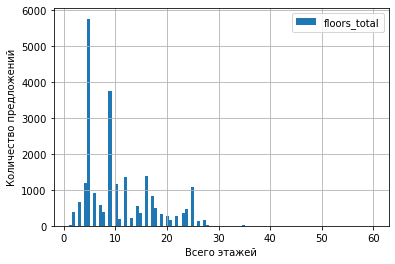

In [108]:
(data['floors_total']
 .hist(bins= 100, legend=True)
 .set(xlabel='Всего этажей', ylabel='Количество предложений')
)
plt.show()

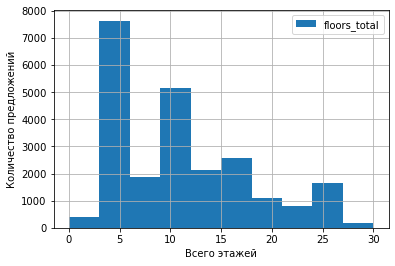

In [109]:
(data['floors_total']
 .hist(bins= 10,  range = (0,30), legend=True)
 .set(xlabel='Всего этажей', ylabel='Количество предложений')
)
plt.show()

Построив гистограмму, видим что большая часть жилья это пятиэтажки  

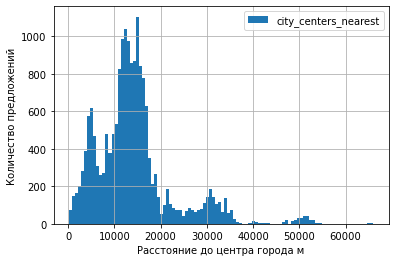

In [110]:
(data['city_centers_nearest']
 .hist(bins= 100, legend=True)
 .set(xlabel='Расстояние до центра города м', ylabel='Количество предложений')
)
plt.show()

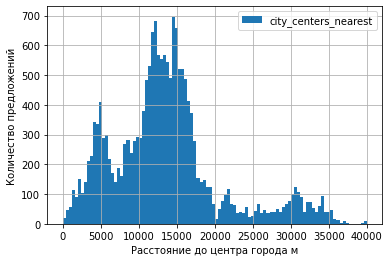

In [111]:
(data['city_centers_nearest']
 .hist(bins= 100,  range = (0,40000), legend=True)
 .set(xlabel='Расстояние до центра города м', ylabel='Количество предложений')
)
plt.show()

Видим 2 пика в районе   12 и 16 кс от центра, так же меньшие пики в районе 5 км. Можем предположить что это удаление популярных спальных районов 

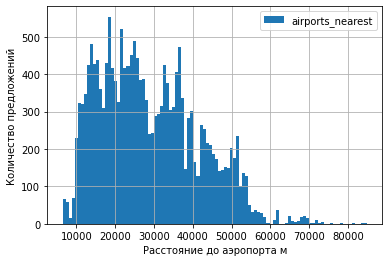

In [112]:
(data['airports_nearest']
 .hist(bins= 100, legend=True)
 .set(xlabel='Расстояние до аэропорта м', ylabel='Количество предложений')
)
plt.show()

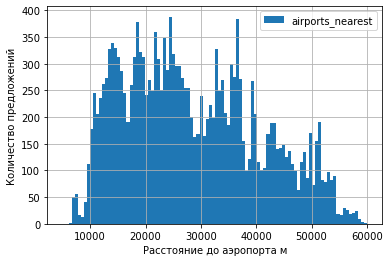

In [113]:
(data['airports_nearest']
 .hist(bins= 100,  range = (5000,60000), legend=True)
 .set(xlabel='Расстояние до аэропорта м', ylabel='Количество предложений')
)
plt.show()

Видим что в радиусе 5 км от аэропорта почти никто не продаёт жильё  

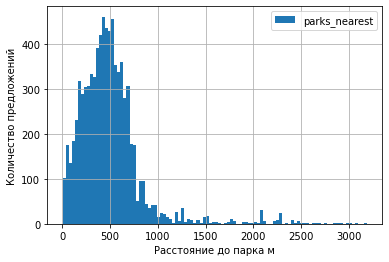

In [114]:
(data['parks_nearest']
 .hist(bins= 100, legend=True)
 .set(xlabel='Расстояние до парка м', ylabel='Количество предложений')
)
plt.show()

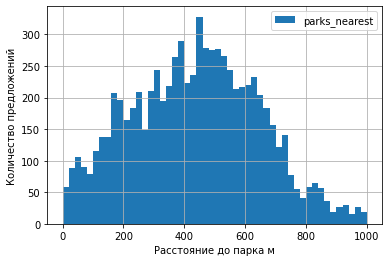

In [115]:
(data['parks_nearest']
 .hist(bins= 50,  range = (0,1000), legend=True)
 .set(xlabel='Расстояние до парка м', ylabel='Количество предложений')
)
plt.show()

Хорошая новость в том что основная масса квартир рядом с парком, в большинстве случаев можно дойти   

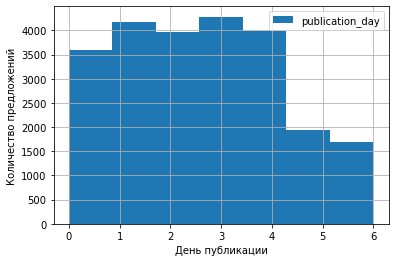

In [116]:
(data['publication_day']
 .hist(bins= 7, legend=True)
 .set(xlabel='День публикации', ylabel='Количество предложений')
)
plt.show()

Видим что в выходные объявления размещают реже чем в рабочие дни    

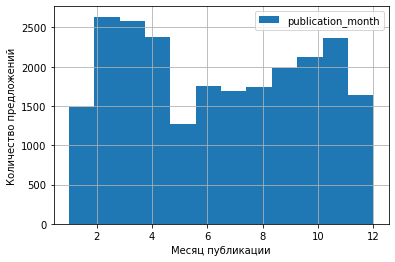

In [117]:
(data['publication_month']
 .hist(bins= 12, legend=True)
 .set(xlabel='Месяц публикации', ylabel='Количество предложений')
)
plt.show()

Летом и зимой реже выставляют объявления чем в межсезонье

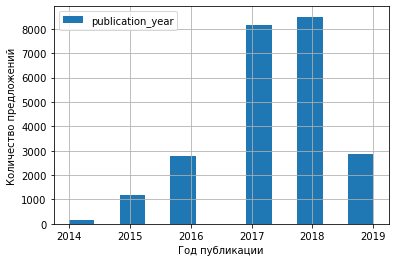

In [118]:
(data['publication_year']
 .hist(bins= 12, legend=True)
 .set(xlabel='Год публикации', ylabel='Количество предложений')
)
plt.show()

До 2018 количество публикаций росло, в 2019 наблюдается спад           

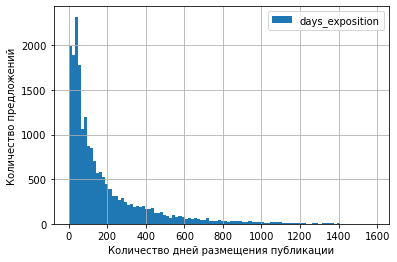

In [119]:
(data['days_exposition']
 .hist(bins= 100, legend=True)
 .set(xlabel='Количество дней размещения публикации', ylabel='Количество предложений')
)
plt.show()

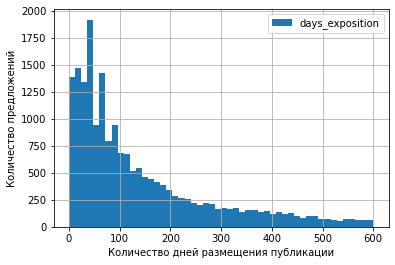

In [120]:
(data['days_exposition']
 .hist(bins= 50, range = (0,600), legend=True)
 .set(xlabel='Количество дней размещения публикации', ylabel='Количество предложений')
)
plt.show()

In [121]:
data['days_exposition'].describe()

count    20451.000000
mean       180.823529
std        219.848289
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [122]:
data['days_exposition'].median()

95.0

Обычно продажи занимают до 100 дней, большинство в районе 50 дней. 
Среднее значение существенно больше но на него оказывают сильное влияние очень  долгие продажи, которые занимают более 3х лет, иногда доходит и до 4х с лишним лет       


Изучим какие факторы больше всего влияют на общую стоимость объекта, для этого построим диограмму рассеяния методом plot или построим графики предварительно сделав сводеую таблицу

In [123]:
data['total_area'].corr(data['last_price'])

0.653815115246023

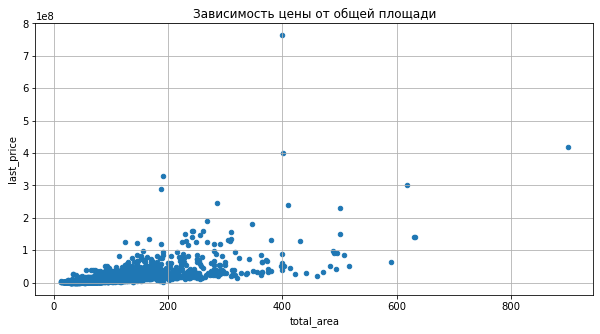

In [124]:
data.plot(kind='scatter',x='total_area', y='last_price',
          grid=True, figsize=(10, 5),  
          title='Зависимость цены от общей площади')
plt.show()

Построим диаграмму рассеивания зависимости цены от общей площади, получилось не очень наглядно, немного улучшим восприятие информации сделав точки частично прозрачными

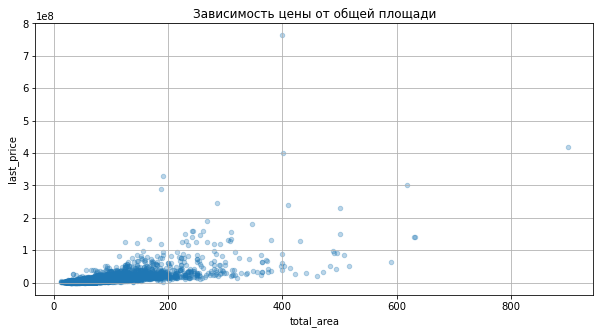

In [125]:
data.plot(kind='scatter',x='total_area', y='last_price',
          grid=True, figsize=(10, 5),  alpha=0.3, 
          title='Зависимость цены от общей площади')
plt.show()

Стало лучше, но из за выбросов основная масса данных всё равно сливается, граничим выборку

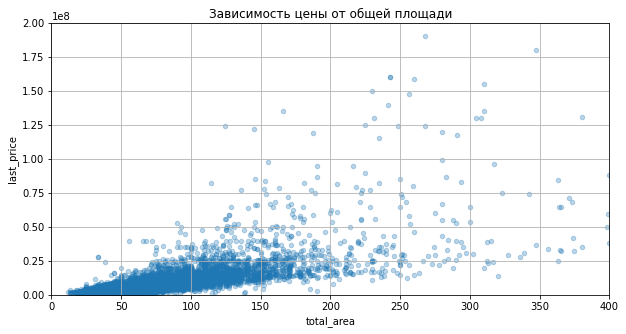

In [126]:
data.plot(kind='scatter',x='total_area', y='last_price',
          grid=True, figsize=(10, 5),xlim=(0, 400), 
          ylim=(0, 200000000), alpha=0.3, 
          title='Зависимость цены от общей площади')
plt.show()

И ещё раз ограничим выборку

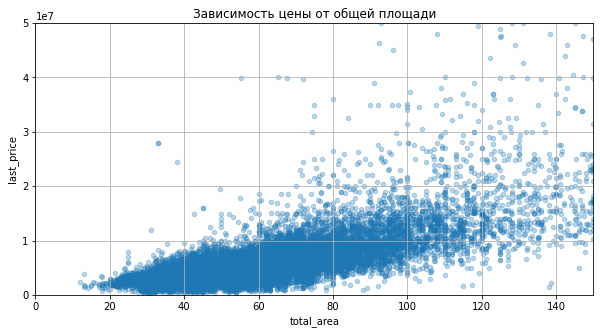

In [127]:
data.plot(kind='scatter',x='total_area', y='last_price',
          grid=True, figsize=(10, 5),xlim=(0, 150), 
          ylim=(0, 50000000), alpha=0.3, 
          title='Зависимость цены от общей площади')
plt.show()

Мы видим тенденцию к увеличению цены в зависимости от площади жилья 

In [128]:
data['living_area'].corr(data['last_price'])

0.580359692523995

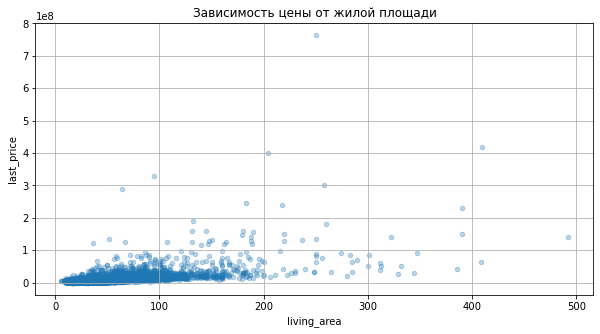

In [129]:
data.plot(kind='scatter',x='living_area', y='last_price',
          grid=True, figsize=(10, 5), alpha=0.3, 
          title='Зависимость цены от жилой площади')
plt.show()

Ограничим выборку как и в примере с общей площадью  

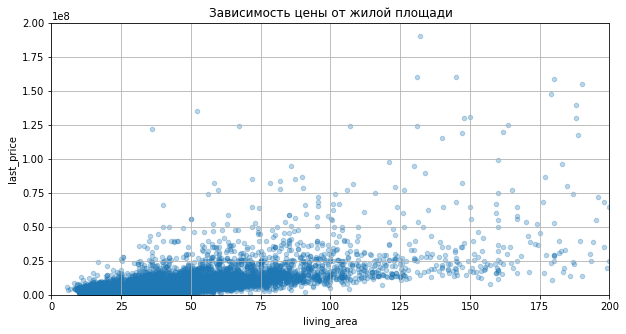

In [130]:
data.plot(kind='scatter',x='living_area', y='last_price',grid=True, 
          figsize=(10, 5),xlim=(0, 200), ylim=(0, 200000000), 
          alpha=0.3, title='Зависимость цены от жилой площади')
plt.show()

Наблюдаем увеличение цены с увеличением жилой площади   

In [131]:
data['kitchen_area'].corr(data['last_price'])

0.5149443245174694

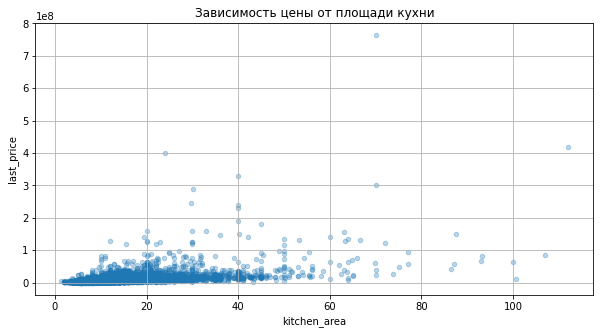

In [132]:
data.plot(kind='scatter',x='kitchen_area', y='last_price',grid=True, 
          figsize=(10, 5), alpha=0.3, title='Зависимость цены от площади кухни')
plt.show()

Повторим процедура аналогично ранее проделанным для другим площадей    

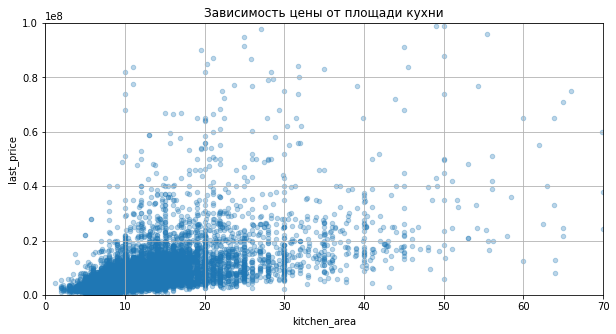

In [133]:
data.plot(kind='scatter',x='kitchen_area', y='last_price',grid=True, 
          figsize=(10, 5),xlim=(0, 70), ylim=(0, 100000000), 
          alpha=0.3, title='Зависимость цены от площади кухни')
plt.show()


Общая тенденция на увеличение цены в зависимости от площади кухни прослеживается как и в остальных примерах, но тенденция менее явная     

Для дальнейшего анализа перейдём с диаграмм расеиная на графики по сводным таблицам 

In [134]:
data['rooms'].corr(data['last_price'])

0.3634928936679001

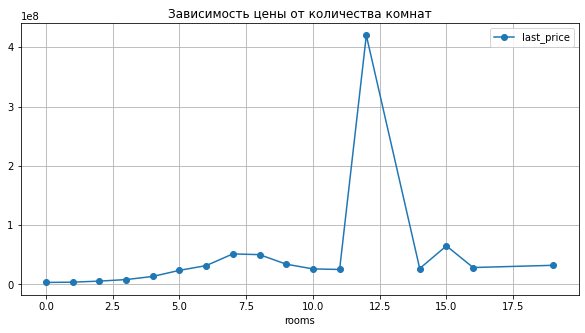

In [135]:

data.pivot_table(index='rooms', values='last_price').plot(style='o-',grid=True, figsize=(10, 5),  
                                                          title='Зависимость цены от количества комнат')
plt.show()

Цена постепенно растёт от количества комнат,  есть пик в районе 11 комнат, но это может быть связано с достаточно редким количеством такого жилья. Ограничим выборку и посмотрим поближе       

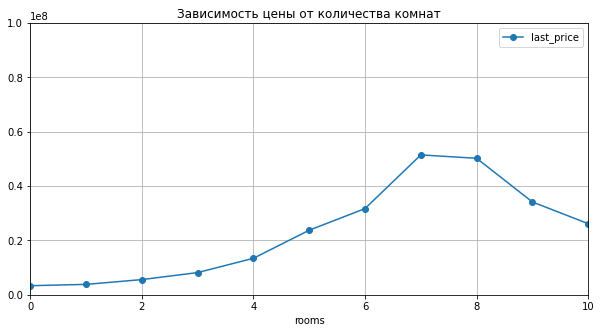

In [136]:
data.pivot_table(index='rooms', values='last_price').plot(style='o-',grid=True, 
                                                          figsize=(10, 5),xlim=(0, 10),ylim=(0, 100000000),  
                                                          title='Зависимость цены от количества комнат')
plt.show()

После ограничения вывода данных отчётливее стало видно стремление к увеличению цены от количества комнат 

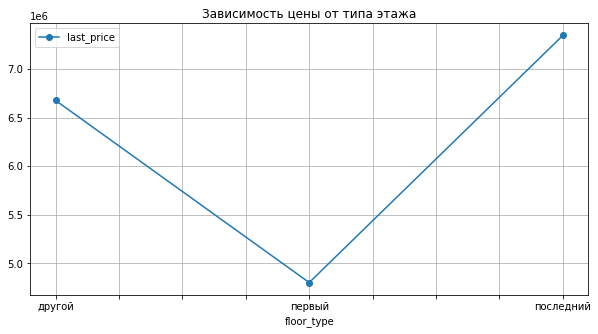

In [137]:
data.pivot_table(index='floor_type', values='last_price').plot(style='o-',grid=True, 
                                                               figsize=(10, 5),  
                                                               title='Зависимость цены от типа этажа')
plt.show()

Посмотрев на график можно увидеть что максимальные стоимости как правило на последние этажи а минимальные на первые  

In [138]:
data['publication_day'].corr(data['last_price'])

0.0018567905045058677

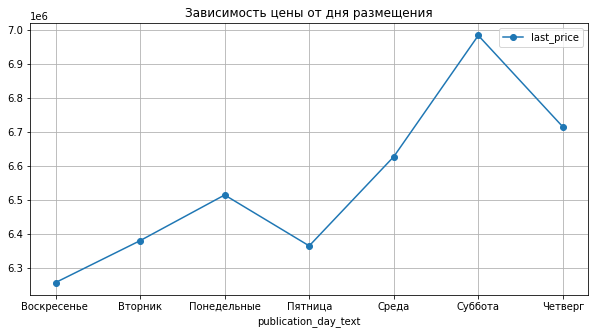

In [139]:
data.pivot_table(index='publication_day_text', values='last_price').plot(style='o-',grid=True, 
                                                                         figsize=(10, 5),  
                                                                         title='Зависимость цены от дня размещения')
plt.show()

Исходя из графика прослеживается зависимость от дня разрешения объявления, как правило в субботу цены максимальные а в воскресенье минимальные   

In [140]:
data['publication_month'].corr(data['last_price'])

0.0024924664933782866

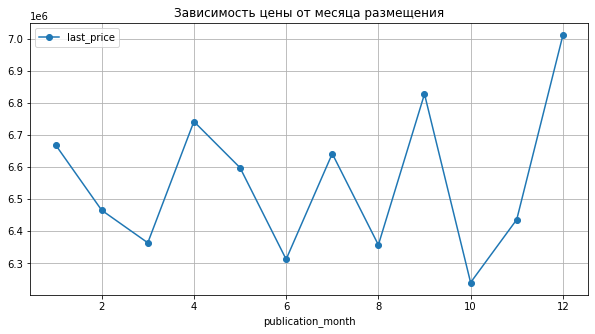

In [141]:
data.pivot_table(index='publication_month', values='last_price').plot(style='o-',grid=True, 
                                                                      figsize=(10, 5),  
                                                                      title='Зависимость цены от месяца размещения')
plt.show()

Посмотрев на график видим зависимость от месяца размещения объявление и цены, так в январе как привило цены максимальные а в октябре минимальные  

In [142]:
data['publication_year'].corr(data['last_price'])

-0.04240571187225694

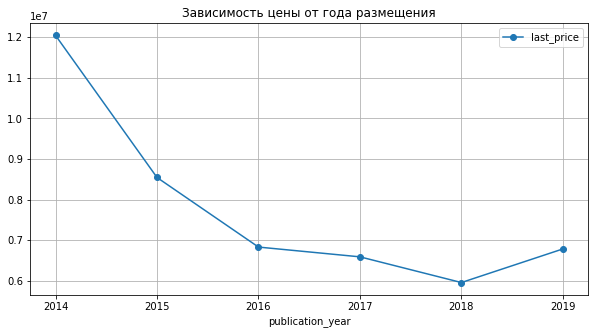

In [143]:
data.pivot_table(index='publication_year', values='last_price').plot(style='o-',grid=True, 
                                                                     figsize=(10, 5),  
                                                                     title='Зависимость цены от года размещения')
plt.show()

График показывает устойчивою тенденцию на снижения стоимость жилья до 2018 года. После чего цена вновь начала расти     

Значительное и резкое влияние на стоимость оказывает год размещения объявления и тип этажа. Площадь жилья оказывеет достаточно плавное увеличение стоимости     

Посмотрим среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [144]:
top_ten_cities= (data.pivot_table(index='locality_name', values='price_square_meter', aggfunc={'count','mean',})
 .sort_values(by='count',ascending=False)
 .head(10)
 .rename (columns={'mean' :'price square meter mean'})
 .round()
)
top_ten_cities

,count,price square meter mean
locality_name,,
санкт-петербург,15710,114798.0
мурино,555,85653.0
кудрово,471,95326.0
шушары,440,78677.0
всеволожск,397,68719.0
пушкин,369,103125.0
колпино,338,75424.0
парголово,327,90175.0
гатчина,307,68746.0


In [145]:
top_ten_cities.sort_values(by='price square meter mean',ascending=False)

,count,price square meter mean
locality_name,,
санкт-петербург,15710,114798.0
пушкин,369,103125.0
кудрово,471,95326.0
парголово,327,90175.0
мурино,555,85653.0
шушары,440,78677.0
колпино,338,75424.0
гатчина,307,68746.0
всеволожск,397,68719.0


Рассчитаем среднюю цену каждого километра в Санкт-Петербурге   

In [146]:
only_spb= data[data['locality_name']=='санкт-петербург']

Создали переменную в которой хранятся только данные по Санкт-Петербургу    

In [147]:
km_price = (only_spb.pivot_table(index='distance_to_center_km', values='price_square_meter', aggfunc={'mean',})
 .rename (columns={'mean' :'price square meter mean'})
 .round()
)
km_price.head()

,price square meter mean
distance_to_center_km,
0.0,245833.0
1.0,177005.0
2.0,157849.0
3.0,121387.0
4.0,133282.0


Создали сводную таблицу с расчётом средней цены за квартиру за каждый километр удаления от центра города    

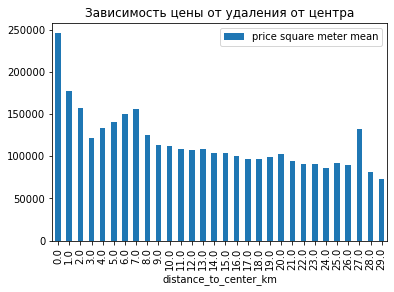

In [148]:
km_price.plot(y='price square meter mean', kind='bar',title='Зависимость цены от удаления от центра')
plt.show()

Мы видим что в среднем чем дальше от центра тем дешевле цена за м2. Но наблюдаем на графике подъём в районе 7го километра и сильный скачок в районе 27го километра     

Проведя анализ цены мы видим что каждый фактор влияет на стоимость жилья, как очевидные факторы такие как площадь квартеты , так и совсем не очевидные такие как дата публикации объявления      

## Общий вывод

Обработав и подготовив данные, мы увидели тенденцию к снижению стоимости жилья в период с 2014 по 2018 года.  В период с 2018 по 2019 годя средняя цена на недвижимость начала расти и превысила данные за 2017 год.   
Это может быть связано с ростом количества объявление о продаже жилья в 2017 и 2018 годах. В этот период они составляли порядка 8000 объявлений в год, в то время как в 2016 и 2019 объявлений было в районе 3000.     
